# Linear Regression Assignment : BoomBikes

#### Problem Statement
BoomBikes - a bike sharing company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

#### Business Goal
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Understanding and Reading Data

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#read csv file 
bikes = pd.read_csv("day.csv")

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#calculate total null values
#bikes.isnull().sum()

In [6]:
#unique values in dataset
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
#change index
bikes = bikes.set_index('instant')

In [8]:
#convert to datetime
bikes['dteday'] = pd.to_datetime(bikes['dteday'], infer_datetime_format=True, format='%d%m%y')
#sns.barplot(data=bikes, x=bikes['dteday'].dt.month, y = 'cnt', hue = bikes['dteday'].dt.year)

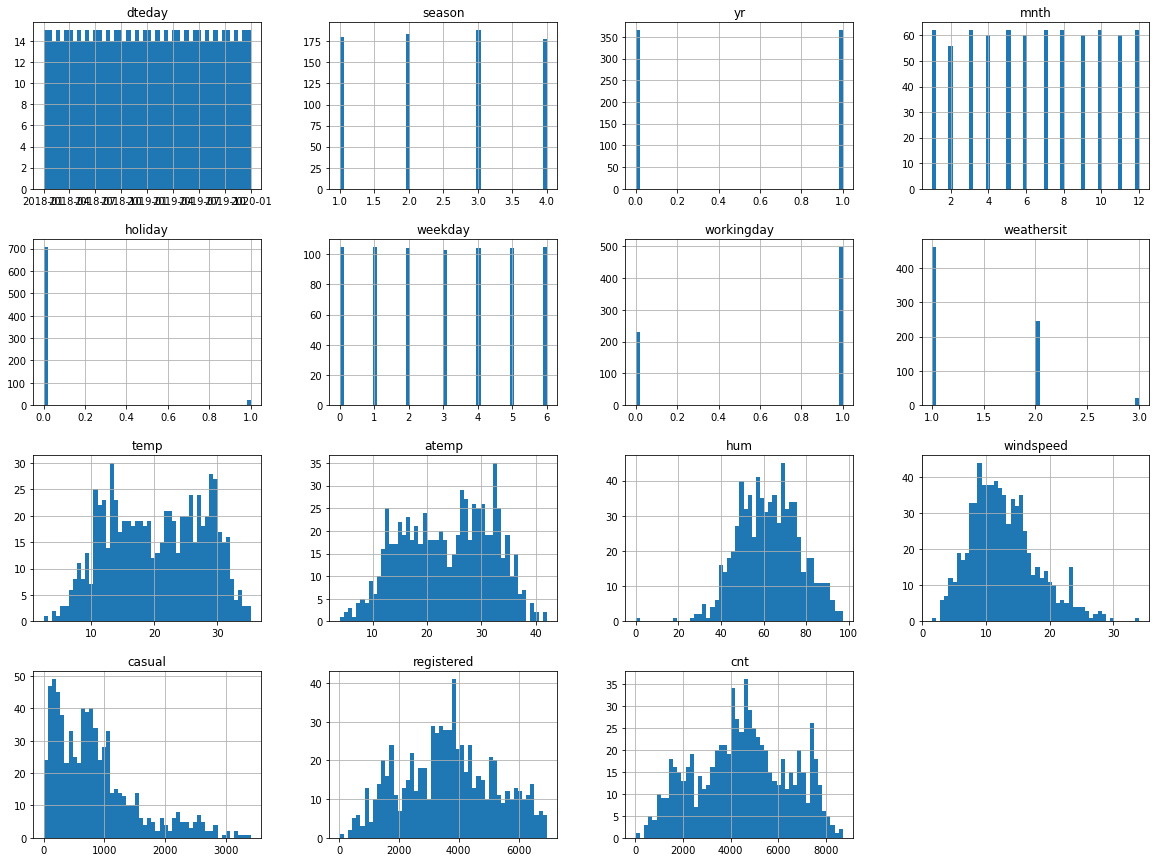

In [9]:
#check which columns are categorical
bikes.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#convert categorical columns to category type
cat_columns = ['season', 'mnth', 'weekday', 'weathersit']

for column in cat_columns:
    bikes[column] = bikes[column].astype('category')

In [11]:
#verify data types
bikes.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
holiday                int64
weekday             category
workingday             int64
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [12]:
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
#check duplicates 

bike_dup = bikes.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [14]:
print(bikes.shape)
print(bike_dup.shape)

#no duplicates

(730, 15)
(730, 15)


### Step 2 : Data analysis using visualization 

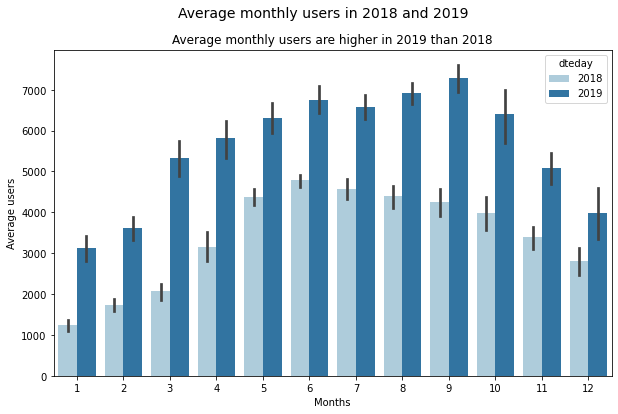

In [15]:
#average monthly users in 2018 and 2019
plt.figure(figsize = (10,6))
sns.set_palette("Paired")
sns.barplot(data=bikes, x='mnth', y = 'cnt', hue = bikes['dteday'].dt.year)
plt.suptitle('Average monthly users in 2018 and 2019', fontsize=14)
plt.title('Average monthly users are higher in 2019 than 2018', fontsize=12)
plt.xlabel('Months')
plt.ylabel('Average users')
plt.show()

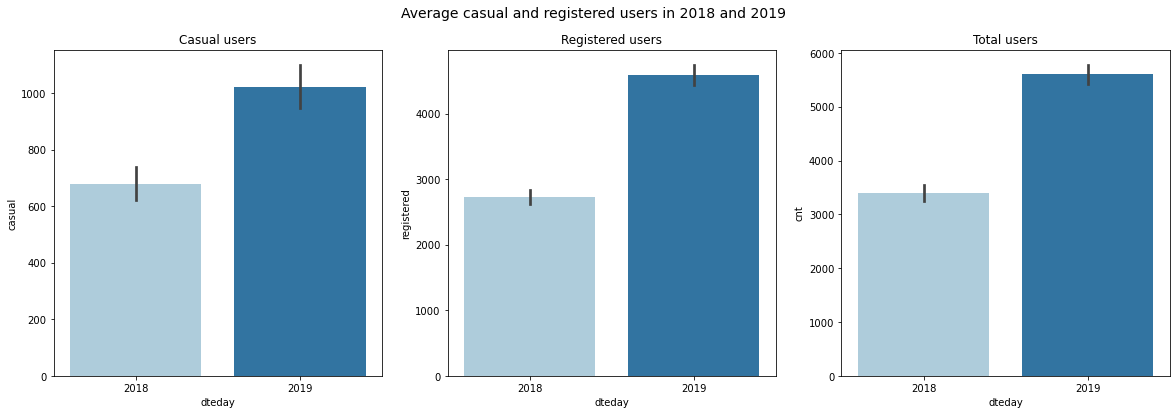

In [16]:
#average number of casual and registered users in 2018 and 2019
plt.figure(figsize=(20, 6))
plt.suptitle('Average casual and registered users in 2018 and 2019', size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x=bikes['dteday'].dt.year, y = 'casual')
plt.title('Casual users')
plt.subplot(1,3,2)
sns.barplot(data=bikes, x=bikes['dteday'].dt.year, y = 'registered')
plt.title('Registered users')
plt.subplot(1,3,3)
sns.barplot(data=bikes, x=bikes['dteday'].dt.year, y = 'cnt')
plt.title('Total users')
plt.show()

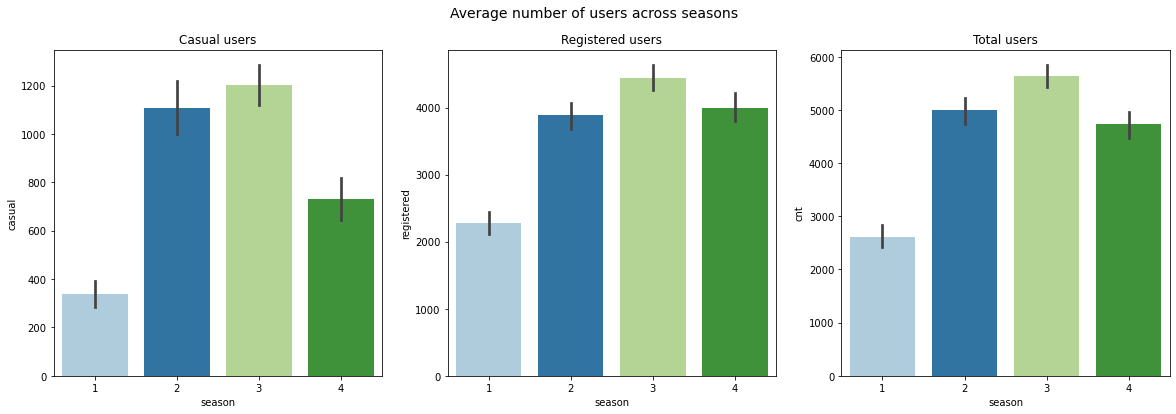

Fall season has a highest number of average daily users


In [17]:
#users across various seasons. 1:spring, 2:summer, 3:fall, 4:winter
plt.figure(figsize=(20, 6))
plt.suptitle('Average number of users across seasons', size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='season', y='casual')
plt.title('Casual users')
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='season', y='registered')
plt.title('Registered users')
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='season', y='cnt')
plt.title('Total users')
plt.show()
print('Fall season has a highest number of average daily users')

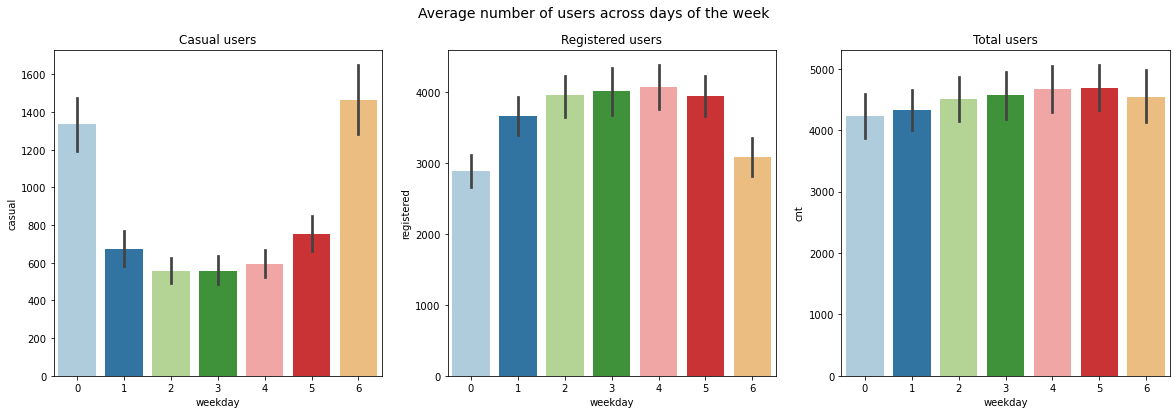

High number of casual users in weekends
High number of registered users in weekdays


In [18]:
#users across days of the week (0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4:Thursday, 5:Friday, 6: Saturday)
plt.figure(figsize=(20, 6))
plt.suptitle("Average number of users across days of the week", size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='weekday', y='casual')
plt.title('Casual users')
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='weekday', y='registered')
plt.title('Registered users')
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='weekday', y='cnt')
plt.title('Total users')
plt.show()
print('High number of casual users in weekends')
print('High number of registered users in weekdays')

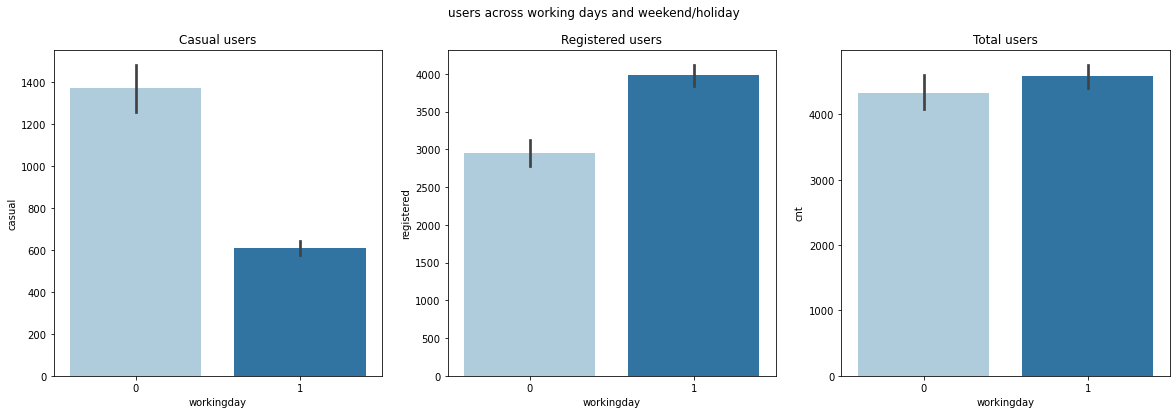

The average number of casual users are high during weekend or holidays
The average number of registered users are high during working days


In [19]:
#users across working days (weekend or holiday: 0, working day: 1)
plt.figure(figsize=(20, 6))
plt.suptitle('users across working days and weekend/holiday')
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='workingday', y='casual')
plt.title("Casual users")
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='workingday', y='registered')
plt.title("Registered users")
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='workingday', y='cnt')
plt.title("Total users")
plt.show()
print('The average number of casual users are high during weekend or holidays')
print('The average number of registered users are high during working days')

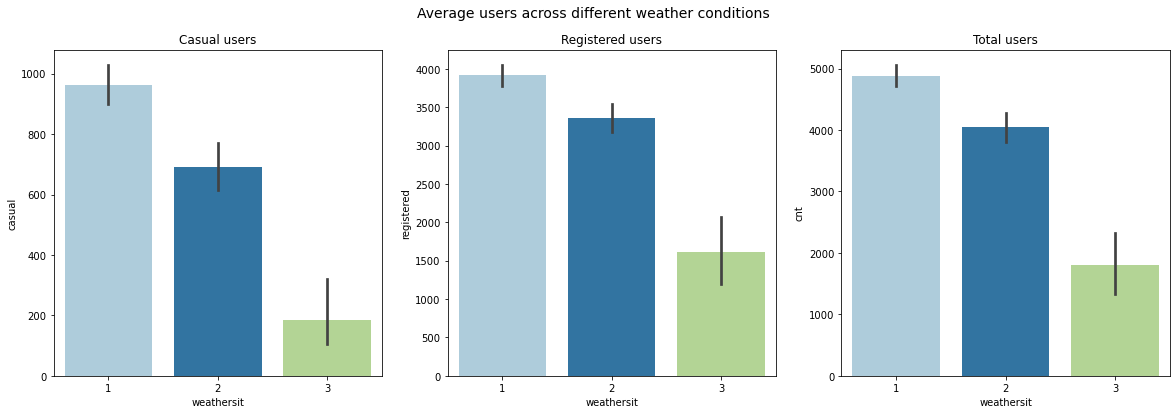

Clear/Pew cloud days has a higher number of users than snow or thunderstorm days


In [20]:
#users across various weather conditions: - 
#1: Clear, Few clouds, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

plt.figure(figsize=(20, 6))
plt.suptitle("Average users across different weather conditions", size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='weathersit', y='casual')
plt.title("Casual users")
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='weathersit', y='registered')
plt.title("Registered users")
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='weathersit', y='cnt')
plt.title("Total users")
plt.show()
print ('Clear/Pew cloud days has a higher number of users than snow or thunderstorm days')

In [21]:
bikes.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


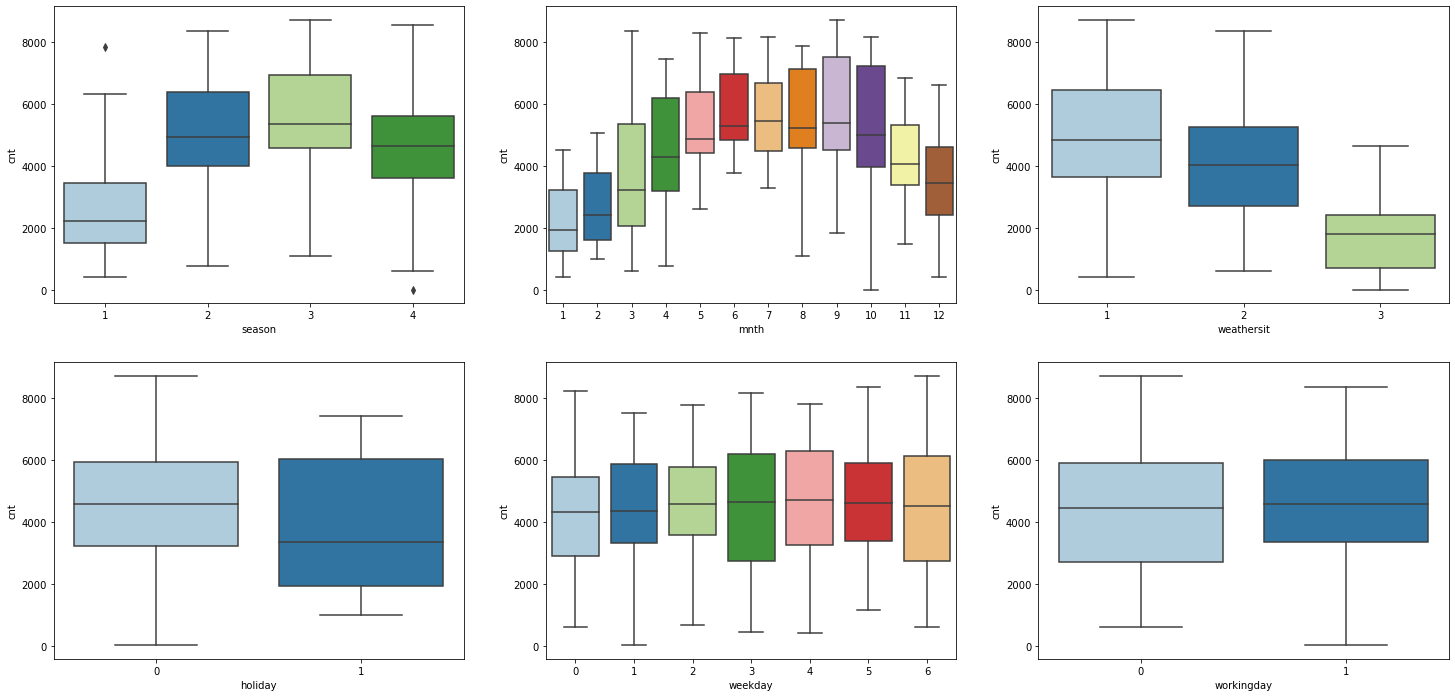

In [22]:
# boxplot of all categorical variables againt the target variable 'cnt' to see how each of the predictor -
# variable stackup against the target variable.

plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

### Step 3: Preprocessing Data for Modelling

In [23]:
# building model using cnt (total users) as a target variable
bikes = bikes.drop(columns = {'dteday', 'casual', 'registered'})

In [24]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [26]:
bike_new = pd.get_dummies(bikes, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [27]:
bike_new.shape

(730, 30)

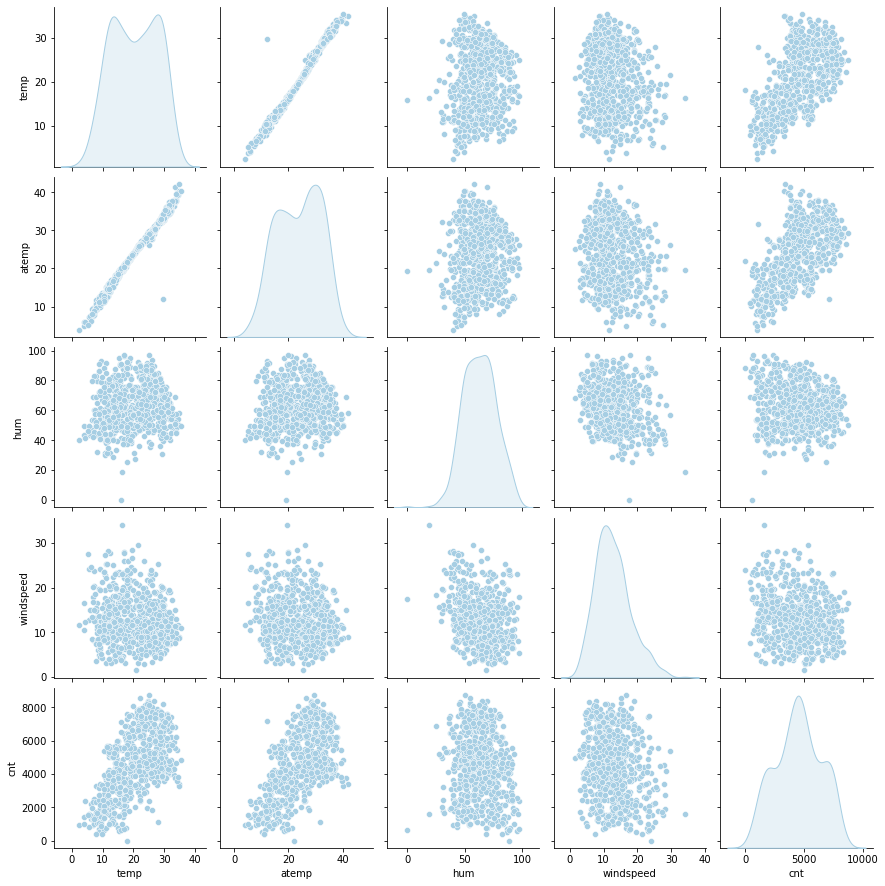

In [28]:
bike_num=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
#creating x and y
y = bike_new['cnt']
X = bike_new.drop('cnt', axis=1)

In [31]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [32]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed']

X[num_vars] = scaler.fit_transform(X[num_vars])

In [33]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,-0.827613,-0.680818,1.252343,-0.387833,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,-0.722069,-0.741507,0.480996,0.748899,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,-1.635432,-1.750344,-1.338073,0.745931,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,-1.615560,-1.610886,-0.261577,-0.389769,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,-1.468226,-1.505615,-1.340294,-0.046477,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
#train-test split
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 4: Building a Linear Model

In [35]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [36]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        01:49:06   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2309.9303    201.831     11.445      0.000    1913.351    2706.509
yr            2018.3484     70.102     28.792      0.000    1880.604    2156.092
holiday       -368.4850    205.529     -1.793      0.074    -772.330      35.360
workingday     381.3982     81.339      4.689      0.000     221.574     541.222
temp           795.2739    281.909      2.821      0.005     241.348    1349.199
atemp           94.0928    257.027      0.366      0.714    -410.942     599.128
hum           -193.4668     49.106     -3.940      0.000    -289.956     -96.978
windspeed     -267.0141     38.126     -7.003      0.000    -341.929    -192.099
season_2       754.4293    205.076      3.679      0.000     351.473    1157.385
season_3       422.2586    260.904      1.618      0.106     -90.394     934.911
season_4      1338.2858    225.592      5.932      0.000     895.018    1781.554
mnth_2         264.1452    179.173      1.474      0.141     -87.913     616.204
mnth_3         555.0142    194.280      2.857      0.004     173.272     936.757
mnth_4         543.8192    291.695      1.864      0.063     -29.335    1116.974
mnth_5         758.4341    314.424      2.412      0.016     140.620    1376.248
mnth_6         529.0121    339.874      1.556      0.120    -138.809    1196.833
mnth_7         202.4264    382.767      0.529      0.597    -549.676     954.529
mnth_8         683.5519    364.899      1.873      0.062     -33.441    1400.545
mnth_9        1254.8747    325.729      3.853      0.000     614.847    1894.903
mnth_10        610.7035    299.247      2.041      0.042      22.711    1198.696
mnth_11        180.6440    285.491      0.633      0.527    -380.320     741.608
mnth_12        147.7093    230.363      0.641      0.522    -304.933     600.351
weekday_1      -86.4530     84.502     -1.023      0.307    -252.492      79.586
weekday_2      -67.3852     97.021     -0.695      0.488    -258.022     123.252
weekday_3       50.6128     91.359      0.554      0.580    -128.899     230.124
weekday_4       15.6966     94.907      0.165      0.869    -170.786     202.179
weekday_5      100.4420     97.454      1.031      0.303     -91.045     291.929
weekday_6      473.9975    126.167      3.757      0.000     226.091     721.904
weathersit_2  -530.4746     90.763     -5.845      0.000    -708.815    -352.134
weathersit_3 -2231.2111    229.741     -9.712      0.000   -2682.632   -1779.791
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                     1.37e+15
===============

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
25,weekday_5,inf
21,weekday_1,inf
1,holiday,inf
23,weekday_3,inf
22,weekday_2,inf
2,workingday,inf
3,temp,62.15
4,atemp,55.92
8,season_3,15.34


In [38]:
X_train = X_train.drop('atemp', axis=1)

In [39]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.74e-182
Time:                        01:49:06   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2314.5423    201.256     11.500      0.000    1919.095    2709.990
yr            2017.5498     70.005     28.820      0.000    1879.997    2155.103
holiday       -373.5289    204.882     -1.823      0.069    -776.101      29.043
workingday     382.0244     81.248      4.702      0.000     222.380     541.669
temp           892.8497     91.724      9.734      0.000     712.621    1073.079
hum           -192.8652     49.035     -3.933      0.000    -289.213     -96.517
windspeed     -270.0051     37.207     -7.257      0.000    -343.114    -196.897
season_2       755.1925    204.881      3.686      0.000     352.621    1157.764
season_3       418.5981    260.478      1.607      0.109     -93.215     930.411
season_4      1338.6195    225.388      5.939      0.000     895.756    1781.483
mnth_2         265.0607    178.995      1.481      0.139     -86.645     616.767
mnth_3         554.7386    194.104      2.858      0.004     173.344     936.133
mnth_4         545.6541    291.390      1.873      0.062     -26.898    1118.206
mnth_5         753.7402    313.880      2.401      0.017     136.998    1370.482
mnth_6         519.8181    338.640      1.535      0.125    -145.575    1185.211
mnth_7         194.9313    381.876      0.510      0.610    -555.415     945.278
mnth_8         670.8535    362.920      1.848      0.065     -42.248    1383.955
mnth_9        1250.2268    325.189      3.845      0.000     611.264    1889.190
mnth_10        611.1361    298.976      2.044      0.041      23.679    1198.593
mnth_11        181.8825    285.214      0.638      0.524    -378.535     742.300
mnth_12        149.4215    230.108      0.649      0.516    -302.718     601.561
weekday_1      -85.4170     84.379     -1.012      0.312    -251.213      80.379
weekday_2      -67.8863     96.924     -0.700      0.484    -258.332     122.560
weekday_3       49.4761     91.224      0.542      0.588    -129.769     228.721
weekday_4       16.0185     94.817      0.169      0.866    -170.288     202.325
weekday_5       96.3043     96.709      0.996      0.320     -93.719     286.327
weekday_6      474.0234    126.054      3.760      0.000     226.341     721.706
weathersit_2  -530.7891     90.677     -5.854      0.000    -708.961    -352.617
weathersit_3 -2237.6927    228.852     -9.778      0.000   -2687.364   -1788.022
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.47e+15
==============================================================================

Notes:
[1] Stand

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weekday_2,inf
22,weekday_3,inf
2,workingday,inf
20,weekday_1,inf
1,holiday,inf
24,weekday_5,inf
23,weekday_4,inf
7,season_3,15.32
8,season_4,10.92
6,season_2,8.88


In [41]:
X_train = X_train.drop('season_3', axis=1)

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.99e-182
Time:                        01:49:06   Log-Likelihood:                -4099.2
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     483   BIC:                             8367.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2337.5612    201.074     11.625      0.000    1942.473    2732.650
yr            2014.7715     70.098     28.742      0.000    1877.036    2152.507
holiday       -377.9471    205.199     -1.842      0.066    -781.140      25.246
workingday     386.5135     81.333      4.752      0.000     226.703     546.324
temp           911.0705     91.170      9.993      0.000     731.932    1090.209
hum           -195.9006     49.078     -3.992      0.000    -292.334     -99.467
windspeed     -274.7498     37.151     -7.396      0.000    -347.747    -201.753
season_2       576.3853    172.318      3.345      0.001     237.800     914.971
season_4      1154.0372    194.243      5.941      0.000     772.372    1535.703
mnth_2         260.5628    179.266      1.454      0.147     -91.674     612.800
mnth_3         603.7780    192.004      3.145      0.002     226.511     981.045
mnth_4         704.0000    274.674      2.563      0.011     164.296    1243.704
mnth_5         898.2467    301.216      2.982      0.003     306.391    1490.103
mnth_6         742.0352    309.628      2.397      0.017     133.651    1350.420
mnth_7         560.8964    307.047      1.827      0.068     -42.416    1164.208
mnth_8        1041.8194    280.502      3.714      0.000     490.664    1592.975
mnth_9        1577.9167    253.730      6.219      0.000    1079.365    2076.469
mnth_10        770.4410    282.525      2.727      0.007     215.311    1325.571
mnth_11        352.3974    265.177      1.329      0.185    -168.645     873.440
mnth_12        268.2533    218.261      1.229      0.220    -160.604     697.111
weekday_1      -81.9872     84.490     -0.970      0.332    -248.001      84.026
weekday_2      -68.3745     97.082     -0.704      0.482    -259.130     122.381
weekday_3       44.8041     91.327      0.491      0.624    -134.643     224.251
weekday_4       18.5553     94.959      0.195      0.845    -168.029     205.139
weekday_5       95.5687     96.866      0.987      0.324     -94.762     285.900
weekday_6      470.4122    126.240      3.726      0.000     222.365     718.460
weathersit_2  -525.9007     90.775     -5.793      0.000    -704.263    -347.539
weathersit_3 -2213.3094    228.722     -9.677      0.000   -2662.723   -1763.896
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.223
Skew:                          -0.785   Prob(JB):                     5.56e-49
Kurtosis:                       5.827   Cond. No.                     1.35e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weekday_1,inf
1,holiday,inf
2,workingday,inf
23,weekday_5,inf
22,weekday_4,inf
20,weekday_2,inf
21,weekday_3,inf
7,season_4,8.09
6,season_2,6.23
17,mnth_11,4.20


In [43]:
X_train = X_train.drop('holiday', axis=1)

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.99e-182
Time:                        01:49:07   Log-Likelihood:                -4099.2
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     483   BIC:                             8367.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2337.5612    201.074     11.625      0.000    1942.473    2732.650
yr            2014.7715     70.098     28.742      0.000    1877.036    2152.507
workingday     764.4606    231.444      3.303      0.001     309.699    1219.223
temp           911.0705     91.170      9.993      0.000     731.932    1090.209
hum           -195.9006     49.078     -3.992      0.000    -292.334     -99.467
windspeed     -274.7498     37.151     -7.396      0.000    -347.747    -201.753
season_2       576.3853    172.318      3.345      0.001     237.800     914.971
season_4      1154.0372    194.243      5.941      0.000     772.372    1535.703
mnth_2         260.5628    179.266      1.454      0.147     -91.674     612.800
mnth_3         603.7780    192.004      3.145      0.002     226.511     981.045
mnth_4         704.0000    274.674      2.563      0.011     164.296    1243.704
mnth_5         898.2467    301.216      2.982      0.003     306.391    1490.103
mnth_6         742.0352    309.628      2.397      0.017     133.651    1350.420
mnth_7         560.8964    307.047      1.827      0.068     -42.416    1164.208
mnth_8        1041.8194    280.502      3.714      0.000     490.664    1592.975
mnth_9        1577.9167    253.730      6.219      0.000    1079.365    2076.469
mnth_10        770.4410    282.525      2.727      0.007     215.311    1325.571
mnth_11        352.3974    265.177      1.329      0.185    -168.645     873.440
mnth_12        268.2533    218.261      1.229      0.220    -160.604     697.111
weekday_1     -459.9343    237.349     -1.938      0.053    -926.299       6.430
weekday_2     -446.3215    265.735     -1.680      0.094    -968.460      75.817
weekday_3     -333.1429    262.848     -1.267      0.206    -849.610     183.324
weekday_4     -359.3917    260.931     -1.377      0.169    -872.091     153.308
weekday_5     -282.3783    262.835     -1.074      0.283    -798.819     234.063
weekday_6      470.4122    126.240      3.726      0.000     222.365     718.460
weathersit_2  -525.9007     90.775     -5.793      0.000    -704.263    -347.539
weathersit_3 -2213.3094    228.722     -9.677      0.000   -2662.723   -1763.896
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.223
Skew:                          -0.785   Prob(JB):                     5.56e-49
Kurtosis:                       5.827   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,31.04
20,weekday_3,8.94
6,season_4,8.09
19,weekday_2,7.59
21,weekday_4,7.37
22,weekday_5,7.20
18,weekday_1,6.90
5,season_2,6.23
16,mnth_11,4.20
15,mnth_10,4.18


### Step 5: Residual Analysis of the train data¶

In [45]:
y_train_pred = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

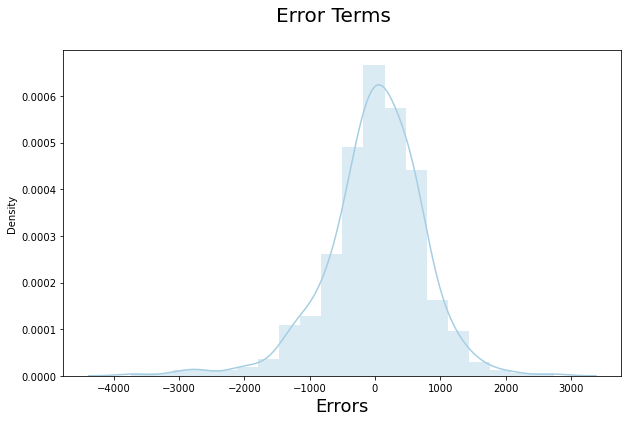

In [46]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [47]:
X_test = X_test.drop(["atemp", "season_3", "holiday"], axis = 1)

In [48]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [49]:
y_pred = lr_4.predict(X_test)

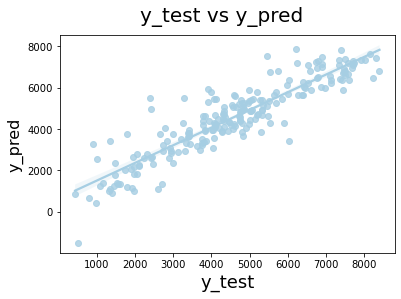

In [50]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203019103160772